In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import pylab
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats
import sklearn
from sklearn import preprocessing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv("churn_clean.csv")
df.dropna()
print(df.shape)
print(list(df.columns))
df.head()

(10000, 50)
['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']


,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [3]:
#check for missing data
df.isna().any()

CaseOrder               False
Customer_id             False
Interaction             False
UID                     False
City                    False
State                   False
County                  False
Zip                     False
Lat                     False
Lng                     False
Population              False
Area                    False
TimeZone                False
Job                     False
Children                False
Age                     False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                  False
Contract                False
Port_modem              False
Tablet                  False
InternetService         False
Phone                   False
Multiple                False
OnlineSecurity          False
OnlineBackup            False
DeviceProt

In [4]:
df.fillna(df.mean(), inplace=True)

In [5]:
df.isna()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.nunique()

CaseOrder               10000
Customer_id             10000
Interaction             10000
UID                     10000
City                     6058
State                      52
County                   1620
Zip                      8583
Lat                      8563
Lng                      8630
Population               5933
Area                        3
TimeZone                   25
Job                       639
Children                   11
Age                        72
Income                   9993
Marital                     5
Gender                      3
Churn                       2
Outage_sec_perweek       9986
Email                      23
Contacts                    8
Yearly_equip_failure        6
Techie                      2
Contract                    3
Port_modem                  2
Tablet                      2
InternetService             3
Phone                       2
Multiple                    2
OnlineSecurity              2
OnlineBackup                2
DeviceProt

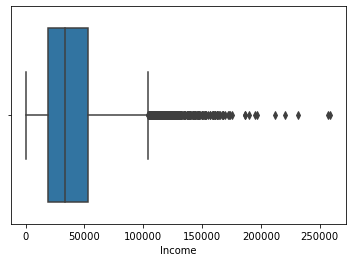

In [7]:
# dictating outliers
boxplot=sns.boxplot(x='Income',data=df)

In [8]:
# Dropping outliers systematically
outlierFilter=df['Income'] < 65000
df = df[outlierFilter]

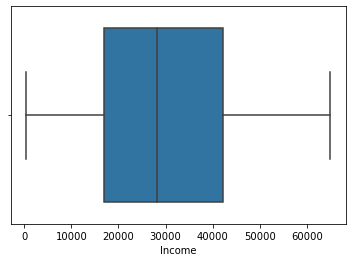

In [9]:
boxplot=sns.boxplot(x='Income',data=df)

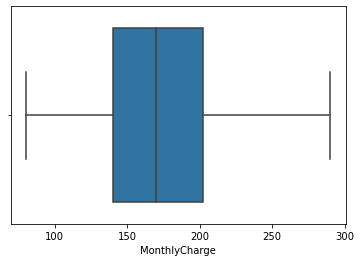

In [10]:
boxplot=sns.boxplot(x='MonthlyCharge',data=df)

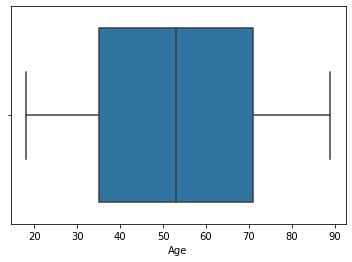

In [11]:
boxplot=sns.boxplot(x='Age',data=df)

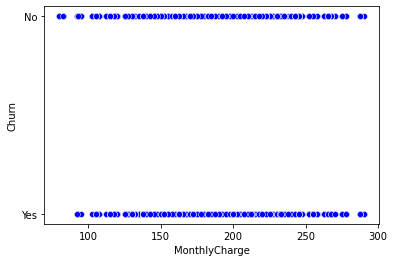

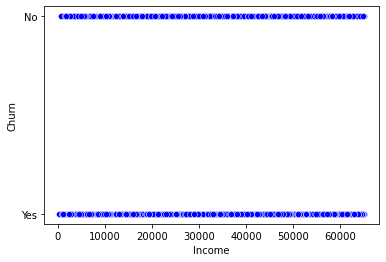

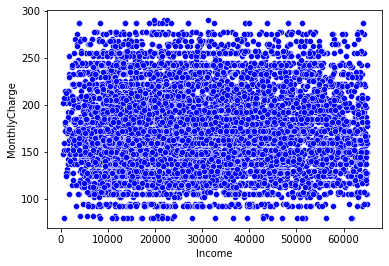

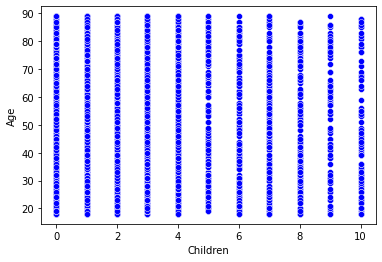

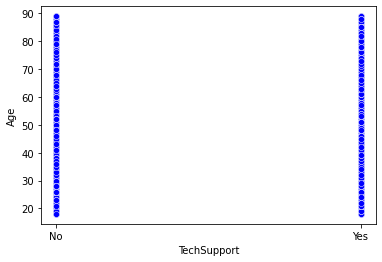

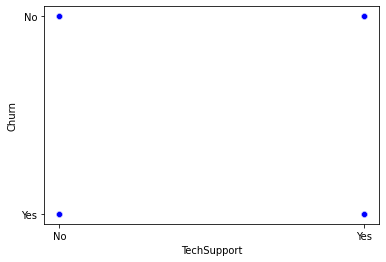

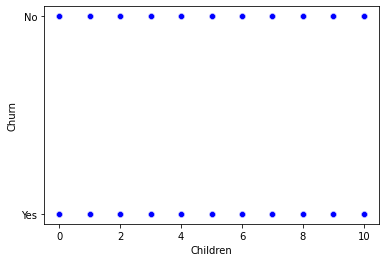

In [12]:
#create scatterplots to look for correlations
sns.scatterplot(x=df['MonthlyCharge'],y=df['Churn'],color='blue')
plt.show();
sns.scatterplot(x=df['Income'],y=df['Churn'],color='blue')
plt.show();
sns.scatterplot(x=df['Income'],y=df['MonthlyCharge'],color='blue')
plt.show();
sns.scatterplot(x=df['Children'],y=df['Age'],color='blue')
plt.show();
sns.scatterplot(x=df['TechSupport'],y=df['Age'],color='blue')
plt.show();
sns.scatterplot(x=df['TechSupport'],y=df['Churn'],color='blue')
plt.show();
sns.scatterplot(x=df['Children'],y=df['Churn'],color='blue')
plt.show();

In [13]:
#check for duplicate data in columns
df[df.duplicated()]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8


In [14]:
# check if any cols are duplicated - Looking for False
df.columns.duplicated().any()

False

In [15]:
# check if any rows are duplicated - looking for False
df.duplicated().any()

False

In [16]:
# The dropping of  demographic data
df = df.drop(['CaseOrder','Customer_id','Marital','Gender','Contract','InternetService','PaymentMethod','Email','Techie','Port_modem','Phone','OnlineBackup','PaperlessBilling','Tenure','Bandwidth_GB_Year','Job','Interaction','UID','City','State','County','Zip','Lat','Lng','Population','Area','TimeZone','Job','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Techie','Contract','Port_modem','Tablet'], axis=1)

In [17]:
# Lets verify columns were dropped
df.head()

,Children,Age,Income,Churn,Multiple,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharge,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,0,68,28561.99,No,No,Yes,No,No,No,Yes,172.455519,5,5,5,3,4,4,3,4
1,1,27,21704.77,Yes,Yes,Yes,No,No,Yes,Yes,242.632554,3,4,3,3,4,3,4,4
2,4,50,9609.57,No,Yes,No,No,No,No,Yes,159.947583,4,4,2,4,4,3,3,3
3,1,48,18925.23,No,No,Yes,No,No,Yes,No,119.956840,4,4,4,2,5,4,3,3
4,0,83,40074.19,Yes,No,No,No,Yes,Yes,No,149.948316,4,4,4,3,4,4,4,5


In [18]:
#The overview of descriptive statistics
df.describe()

,Children,Age,Income,MonthlyCharge,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000,8361.000000
mean,2.091257,53.077263,30041.491375,172.876678,3.494678,3.498983,3.484153,3.506279,3.496950,3.495634,3.504366,3.491090
std,2.150480,20.654923,15993.003559,42.875436,1.034571,1.032269,1.034694,1.029117,1.025639,1.037231,1.030637,1.030143
min,0.000000,18.000000,348.670000,79.978860,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,35.000000,16970.750000,139.983000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.000000,53.000000,28251.230000,169.937800,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000
75%,3.000000,71.000000,42215.280000,202.443300,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,89.000000,64963.050000,290.160419,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [19]:
#rename survey columns for easier identification
df.rename(columns={'Item1':'Timely response','Item2':'Timely fixes','Item3':'Timely replacements','Item4':'Reliability','Item5':'Options','Item6':'Respectful response','Item7':'Courteous exchange','Item8':'Evidence of active listening'},inplace=True)

In [20]:
#verify columns were renamed correctly
df.head()

,Children,Age,Income,Churn,Multiple,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharge,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,0,68,28561.99,No,No,Yes,No,No,No,Yes,172.455519,5,5,5,3,4,4,3,4
1,1,27,21704.77,Yes,Yes,Yes,No,No,Yes,Yes,242.632554,3,4,3,3,4,3,4,4
2,4,50,9609.57,No,Yes,No,No,No,No,Yes,159.947583,4,4,2,4,4,3,3,3
3,1,48,18925.23,No,No,Yes,No,No,Yes,No,119.956840,4,4,4,2,5,4,3,3
4,0,83,40074.19,Yes,No,No,No,Yes,Yes,No,149.948316,4,4,4,3,4,4,4,5


In [21]:
#change yes/no to 1/0
df = df.replace(to_replace = ['Yes','No'],value = [1,0])

In [22]:
#Lets ensure values were changed
df.head()

,Children,Age,Income,Churn,Multiple,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharge,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,0,68,28561.99,0,0,1,0,0,0,1,172.455519,5,5,5,3,4,4,3,4
1,1,27,21704.77,1,1,1,0,0,1,1,242.632554,3,4,3,3,4,3,4,4
2,4,50,9609.57,0,1,0,0,0,0,1,159.947583,4,4,2,4,4,3,3,3
3,1,48,18925.23,0,0,1,0,0,1,0,119.956840,4,4,4,2,5,4,3,3
4,0,83,40074.19,1,0,0,0,1,1,0,149.948316,4,4,4,3,4,4,4,5


In [23]:
print(list(df.columns))

['Children', 'Age', 'Income', 'Churn', 'Multiple', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MonthlyCharge', 'Timely response', 'Timely fixes', 'Timely replacements', 'Reliability', 'Options', 'Respectful response', 'Courteous exchange', 'Evidence of active listening']


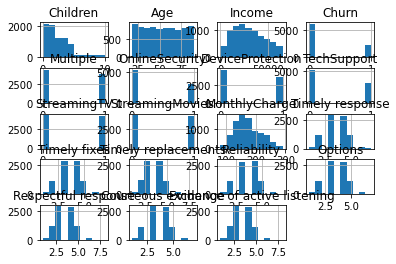

In [24]:
#create histograms of both categorical and continuous variables
df[["Children", "Age", "Income", "Churn", "Multiple", "OnlineSecurity", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "MonthlyCharge", "Timely response", "Timely fixes", "Timely replacements", "Reliability", "Options", "Respectful response", "Courteous exchange", "Evidence of active listening"]].hist()
plt.savefig('Churn_plot,jpg')
plt.show()

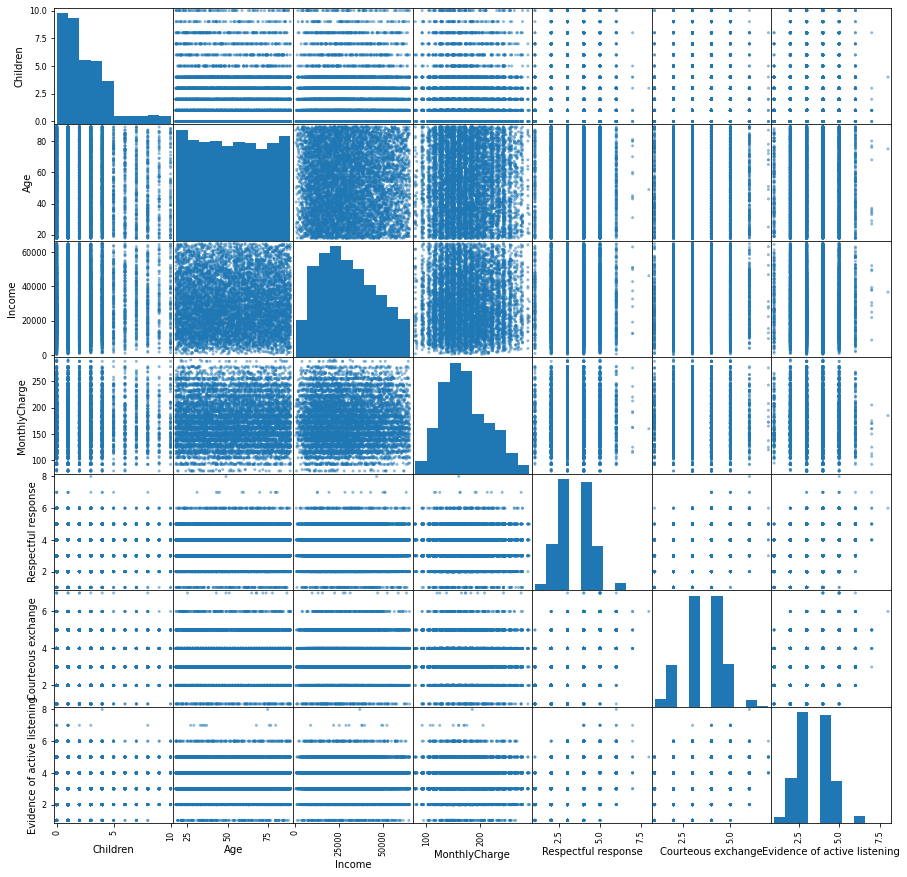

In [25]:
#lets create scatterplots for numeric variables to view distributions and look for relationships
Churn_numeric=df[['Children','Age','Income','MonthlyCharge','Respectful response','Courteous exchange','Evidence of active listening']]
pd.plotting.scatter_matrix(Churn_numeric,figsize=[15,15]);

In [26]:
df

,Children,Age,Income,Churn,Multiple,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharge,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,0,68,28561.99,0,0,1,0,0,0,1,172.455519,5,5,5,3,4,4,3,4
1,1,27,21704.77,1,1,1,0,0,1,1,242.632554,3,4,3,3,4,3,4,4
2,4,50,9609.57,0,1,0,0,0,0,1,159.947583,4,4,2,4,4,3,3,3
3,1,48,18925.23,0,0,1,0,0,1,0,119.956840,4,4,4,2,5,4,3,3
4,0,83,40074.19,1,0,0,0,1,1,0,149.948316,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,23,55723.74,0,1,0,1,0,0,0,159.979400,3,2,3,3,4,3,2,3
9996,4,48,34129.34,0,1,1,1,0,1,0,207.481100,4,5,5,4,4,5,2,5
9997,1,48,45983.43,0,1,1,0,0,0,0,169.974100,4,4,4,4,4,4,4,5
9998,1,39,16667.58,0,1,0,0,1,1,1,252.624000,4,4,6,4,3,3,5,4


In [27]:
#export prepared dataset
df.to_csv('prepared_d212task1.csv', index = False)

In [28]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats
#Import required module
from sklearn.cluster import KMeans
import sklearn
from sklearn import preprocessing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')
df = pd.read_csv("prepared_d212task1.csv")
df.dropna()
print(df.shape)
print(list(df.columns))
df.head()

(8361, 19)
['Children', 'Age', 'Income', 'Churn', 'Multiple', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MonthlyCharge', 'Timely response', 'Timely fixes', 'Timely replacements', 'Reliability', 'Options', 'Respectful response', 'Courteous exchange', 'Evidence of active listening']


,Children,Age,Income,Churn,Multiple,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharge,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,0,68,28561.99,0,0,1,0,0,0,1,172.455519,5,5,5,3,4,4,3,4
1,1,27,21704.77,1,1,1,0,0,1,1,242.632554,3,4,3,3,4,3,4,4
2,4,50,9609.57,0,1,0,0,0,0,1,159.947583,4,4,2,4,4,3,3,3
3,1,48,18925.23,0,0,1,0,0,1,0,119.956840,4,4,4,2,5,4,3,3
4,0,83,40074.19,1,0,0,0,1,1,0,149.948316,4,4,4,3,4,4,4,5


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8361 entries, 0 to 8360
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Children                      8361 non-null   int64  
 1   Age                           8361 non-null   int64  
 2   Income                        8361 non-null   float64
 3   Churn                         8361 non-null   int64  
 4   Multiple                      8361 non-null   int64  
 5   OnlineSecurity                8361 non-null   int64  
 6   DeviceProtection              8361 non-null   int64  
 7   TechSupport                   8361 non-null   int64  
 8   StreamingTV                   8361 non-null   int64  
 9   StreamingMovies               8361 non-null   int64  
 10  MonthlyCharge                 8361 non-null   float64
 11  Timely response               8361 non-null   int64  
 12  Timely fixes                  8361 non-null   int64  
 13  Tim

In [30]:
df.head()

,Children,Age,Income,Churn,Multiple,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharge,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,0,68,28561.99,0,0,1,0,0,0,1,172.455519,5,5,5,3,4,4,3,4
1,1,27,21704.77,1,1,1,0,0,1,1,242.632554,3,4,3,3,4,3,4,4
2,4,50,9609.57,0,1,0,0,0,0,1,159.947583,4,4,2,4,4,3,3,3
3,1,48,18925.23,0,0,1,0,0,1,0,119.956840,4,4,4,2,5,4,3,3
4,0,83,40074.19,1,0,0,0,1,1,0,149.948316,4,4,4,3,4,4,4,5


In [31]:
#Declare feature vector and target variable
X = df

y = df['Churn']

In [32]:
# Convert categorical variable into integers verified
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Churn'] = le.fit_transform(X['Churn'])

y = le.transform(y)

In [33]:
# View the summary of X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8361 entries, 0 to 8360
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Children                      8361 non-null   int64  
 1   Age                           8361 non-null   int64  
 2   Income                        8361 non-null   float64
 3   Churn                         8361 non-null   int64  
 4   Multiple                      8361 non-null   int64  
 5   OnlineSecurity                8361 non-null   int64  
 6   DeviceProtection              8361 non-null   int64  
 7   TechSupport                   8361 non-null   int64  
 8   StreamingTV                   8361 non-null   int64  
 9   StreamingMovies               8361 non-null   int64  
 10  MonthlyCharge                 8361 non-null   float64
 11  Timely response               8361 non-null   int64  
 12  Timely fixes                  8361 non-null   int64  
 13  Tim

In [34]:
X.head()

,Children,Age,Income,Churn,Multiple,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharge,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,0,68,28561.99,0,0,1,0,0,0,1,172.455519,5,5,5,3,4,4,3,4
1,1,27,21704.77,1,1,1,0,0,1,1,242.632554,3,4,3,3,4,3,4,4
2,4,50,9609.57,0,1,0,0,0,0,1,159.947583,4,4,2,4,4,3,3,3
3,1,48,18925.23,0,0,1,0,0,1,0,119.956840,4,4,4,2,5,4,3,3
4,0,83,40074.19,1,0,0,0,1,1,0,149.948316,4,4,4,3,4,4,4,5


In [35]:
# Feature Scaling

cols = X.columns

In [36]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [37]:
X = pd.DataFrame(X, columns=[cols])

In [38]:
X.head()

,Children,Age,Income,Churn,Multiple,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharge,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
0,0.0,0.704225,0.436642,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.439985,0.666667,0.666667,0.571429,0.333333,0.500000,0.428571,0.333333,0.428571
1,0.1,0.126761,0.330516,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.773872,0.333333,0.500000,0.285714,0.333333,0.500000,0.285714,0.500000,0.428571
2,0.4,0.450704,0.143326,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.380474,0.500000,0.500000,0.142857,0.500000,0.500000,0.285714,0.333333,0.285714
3,0.1,0.422535,0.287499,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.190207,0.500000,0.500000,0.428571,0.166667,0.666667,0.428571,0.333333,0.285714
4,0.0,0.915493,0.614809,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.332900,0.500000,0.500000,0.428571,0.333333,0.500000,0.428571,0.500000,0.571429


In [50]:
# K-Means model with two clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [40]:
# K-Means model parameters study
kmeans.cluster_centers_

array([[2.09686055e-01, 4.95072651e-01, 4.60781787e-01, 3.93526405e-01,
        4.66780239e-01, 3.65295692e-01, 4.49257727e-01, 3.65052324e-01,
        4.83085909e-01, 1.00000000e+00, 5.67900438e-01, 4.13158108e-01,
        4.14618318e-01, 3.52292876e-01, 4.18593332e-01, 4.14983370e-01,
        3.57055940e-01, 4.15348422e-01, 3.55456663e-01],
       [2.08584196e-01, 4.93053807e-01, 4.58337821e-01, 1.38993415e-01,
        4.57666980e-01, 3.53245532e-01, 4.27798683e-01, 3.77704610e-01,
        5.03998119e-01, 8.27116153e-15, 3.20311006e-01, 4.18312951e-01,
        4.18312951e-01, 3.57378041e-01, 4.16862653e-01, 4.17293823e-01,
        3.56000538e-01, 4.19371276e-01, 3.56269319e-01]])

In [41]:
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [42]:
kmeans.inertia_

15196.100786904975

In [43]:
#  Check quality of lower classification by the model

labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 3083 out of 8361 samples were correctly labeled.


In [44]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.37


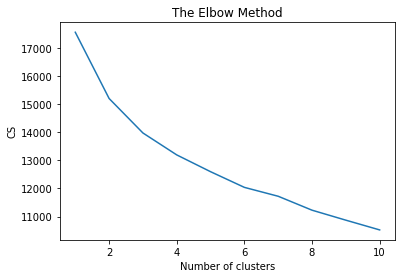

In [45]:
# Use elbow method to find optimal number of clusters

from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [46]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 3083 out of 8361 samples were correctly labeled.
Accuracy score: 0.37


In [47]:
# K-Means model with 3 different clusters 

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))


Result: 1068 out of 8361 samples were correctly labeled.
Accuracy score: 0.13


In [48]:
# K-Means model with 4 clusters

kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1091 out of 8361 samples were correctly labeled.
Accuracy score: 0.13


In [49]:
# K-Means model with 5 clusters

kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1276 out of 8361 samples were correctly labeled.
Accuracy score: 0.15
